In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Load the CSV file into a pandas DataFrame
filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/FrontierX2/RR_Split/1.csv'

In [10]:
# Create empty arrays to store the results
bpm_arr = []
mean_arr = []
range_arr = []
iqr_arr = []
var_arr = []
std_arr = []
cv_arr = []
gender_arr = []
age_arr = []
classification = []
name = []

In [11]:
patient_gender = [0]
patient_age = [22]

In [12]:
full_df = pd.read_csv(filepath)

In [22]:
filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/FrontierX2/RR_Split/'
df_list = []
for filename in os.listdir(filepath):
  df = pd.read_csv(filepath+filename)
  #df['anno'] = filename
  df_list.append(df)

full_df = pd.concat(df_list)
full_df

,R-R Interval (Samples)
0,680.0
1,1480.0
2,760.0
3,1056.0
4,896.0
...,...
445,664.0
446,656.0
447,648.0
448,640.0


In [23]:
full_df.shape

(13950, 1)

array([[<Axes: title={'center': 'R-R Interval (Samples)'}>]], dtype=object)

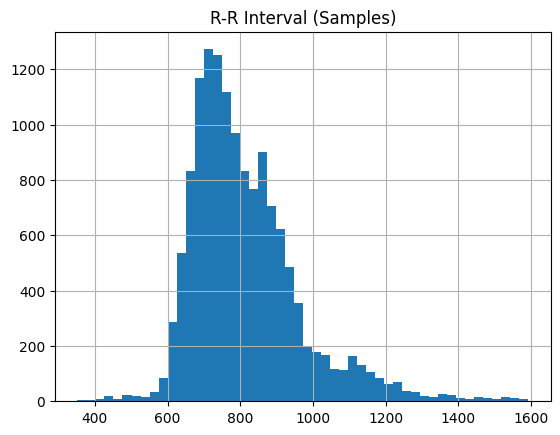

In [24]:
full_df.hist(bins=50)

In [25]:
# Calculate the interquartile range (IQR)
full_q1 = np.percentile(full_df, 25)
full_q3 = np.percentile(full_df, 75)
full_iqr_rr = full_q3 - full_q1

# Calculate the lower and upper bounds for outliers
full_lower_bound = full_q1 - 1.5 * full_iqr_rr
full_upper_bound = full_q3 + 1.5 * full_iqr_rr

# Remove outliers from the data
full_df_clean = full_df[(full_df >= full_lower_bound) & (full_df <= full_upper_bound)]
full_df_clean = pd.DataFrame(full_df_clean)

In [26]:
full_df_clean.shape

(13950, 1)

array([[<Axes: title={'center': 'R-R Interval (Samples)'}>]], dtype=object)

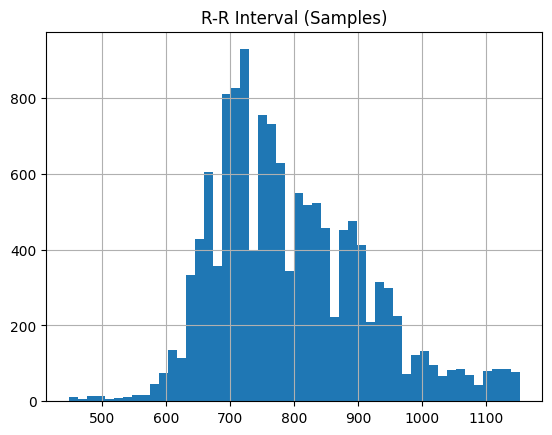

In [27]:
full_df_clean.hist(bins=50)

In [28]:
# Remove outliers from the data
df_clean = df[(df['R-R Interval (Samples)'] >= full_lower_bound) & (df['R-R Interval (Samples)'] <= full_upper_bound)]
data_clean = df_clean['R-R Interval (Samples)']

peaks = len(data_clean)
#Average heart rate
bpm = peaks/5
# Calculate the mean HRV
mean_rr = np.mean(data_clean)
# Calculate the range
range_rr = np.rint(np.max(data_clean) - np.min(data_clean))
# Calculate the interquartile range (IQR)
q1 = np.percentile(data_clean, 25)
q3 = np.percentile(data_clean, 75)
iqr_rr = q3 - q1
# Calculate the variance
var_rr = np.var(data_clean)
# Calculate the standard deviation
std_rr = np.std(data_clean)
# Calculate the coefficient of variation
cv_rr = std_rr / np.mean(data_clean) * 100

bpm_arr.append(bpm)
mean_arr.append(mean_rr)
range_arr.append(range_rr)
iqr_arr.append(iqr_rr)
var_arr.append(var_rr)
std_arr.append(std_rr)
cv_arr.append(cv_rr)
gender_arr.append(patient_gender[0])
age_arr.append(patient_age[0])
classification.append(0)
name.append(filename)


In [30]:
# set the path to the directory containing the files
new_filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/FrontierX2/RR_Split/New'
# Write the data to the CSV file
combined = list(zip(age_arr, gender_arr, bpm_arr, mean_arr, range_arr, iqr_arr, var_arr, std_arr, cv_arr, classification, name))
with open(new_filepath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Gender', 'BPM', 'Mean', 'Range', 'IQR', 'Variance', 'Std Dev', 'Coeff of Var', 'Classification', 'File'])
    for row in combined:
        writer.writerow(row)

In [37]:
import os
import pandas as pd

filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/FrontierX2/RR_Split/'
#i = 0
for filename in os.listdir(filepath):
  # Check if the item is a file, not a directory
  if os.path.isfile(os.path.join(filepath, filename)):
    df = pd.read_csv(filepath + filename)

    # Remove outliers from the data
    df_clean = df[(df['R-R Interval (Samples)'] >= full_lower_bound) & (df['R-R Interval (Samples)'] <= full_upper_bound)]
    data_clean = df_clean['R-R Interval (Samples)']

    peaks = len(data_clean)
    #Average heart rate
    bpm = peaks/(sum(data_clean))*1000 * 60
    # Calculate the mean HRV
    mean_rr = np.mean(data_clean)
    # Calculate the range
    range_rr = np.rint(np.max(data_clean) - np.min(data_clean))
    # Calculate the interquartile range (IQR)
    q1 = np.percentile(data_clean, 25)
    q3 = np.percentile(data_clean, 75)
    iqr_rr = q3 - q1
    # Calculate the variance
    var_rr = np.var(data_clean)
    # Calculate the standard deviation
    std_rr = np.std(data_clean)
    # Calculate the coefficient of variation
    cv_rr = std_rr / np.mean(data_clean) * 100

    bpm_arr.append(bpm)
    mean_arr.append(mean_rr)
    range_arr.append(range_rr)
    iqr_arr.append(iqr_rr)
    var_arr.append(var_rr)
    std_arr.append(std_rr)
    cv_arr.append(cv_rr)
    gender_arr.append(patient_gender[0])
    age_arr.append(patient_age[0])
    classification.append(0)
    name.append(filename)
  #i += 1

In [65]:
print(bpm_arr)

[89.4, 76.26067284536234, 83.35198030879391, 79.20492991783466, 76.57531366089574, 85.71974035891563, 84.46712018140587, 69.64487388630945, 70.89298610816088, 79.8291251014271, 91.42377288980389, 69.90071160183881, 67.64545289085724, 68.17036819345907, 77.50674983707296, 78.88983359650183, 86.63014548179538, 72.95933294324169, 55.80070809174407, 69.4747336282635, 71.607146705748, 78.89697886624751, 68.95936084268779, 65.95870984763539, 71.2547236277461, 76.57562283859127, 85.12750038173766, 76.77465569830858, 66.95962711314148, 80.4193293602355, 78.25900514579763, 85.03487634749531, 76.26067284536234, 83.35198030879391, 79.20492991783466, 76.57531366089574, 85.71974035891563, 84.46712018140587, 69.64487388630945, 70.89298610816088, 79.8291251014271, 91.42377288980389, 69.90071160183881, 67.64545289085724, 68.17036819345907, 77.50674983707296, 78.88983359650183, 86.63014548179538, 72.95933294324169, 55.80070809174407, 69.4747336282635, 71.607146705748, 78.89697886624751, 68.959360842687

In [61]:
print(df)

     R-R Interval (Samples)
0                     680.0
1                     672.0
2                     664.0
3                     664.0
4                     656.0
..                      ...
445                   664.0
446                   656.0
447                   648.0
448                   640.0
449                   632.0

[450 rows x 1 columns]


In [39]:
# set the path to the directory containing the files
new_filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/FrontierX2/RR_Split/New'

# Write the data to the CSV file
combined = list(zip(age_arr, gender_arr, bpm_arr, mean_arr, range_arr, iqr_arr, var_arr, std_arr, cv_arr, classification, name))
with open(new_filepath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Gender', 'BPM', 'Mean', 'Range', 'IQR', 'Variance', 'Std Dev', 'Coeff of Var', 'Classification', 'File'])
    for row in combined:
        writer.writerow(row)

28719.24714040729


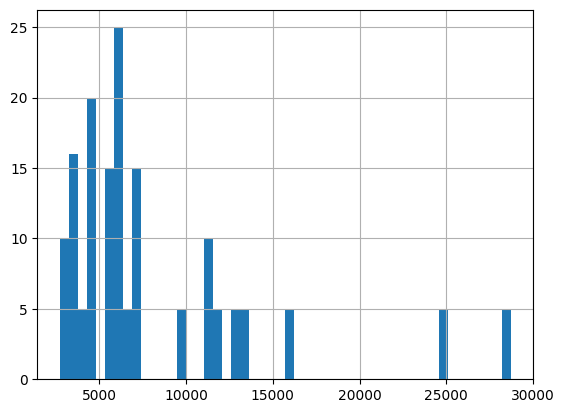

In [40]:
data = pd.read_csv(new_filepath)
#data = data[data['Variance'] <0000]
data['Variance'].hist(bins=50)
print(np.max(data['Variance']))

In [59]:
np.max(data['Variance'])

28719.24714040729

In [ ]:
data = pd.read_csv(filefolder + filename)